<a href="https://colab.research.google.com/github/Jeoungeunseok/ai-breach-of-contract-model/blob/main/%EC%8A%A4%ED%8C%8C%EB%A5%B4%ED%83%80%EC%BD%94%EB%94%A9_AI%EC%97%94%EC%A7%80%EB%8B%88%EC%96%B44%EA%B8%B0_250719_%EC%A0%95%EC%9D%80%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ïπò

In [ ]:
# !pip install scikit-learn==1.3.2 xgboost==2.1.0 torch==2.3.1

In [ ]:
# 2. ÎùºÏù¥Î∏åÎü¨Î¶¨ import
# Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ Î∞è ÏãúÍ∞ÅÌôî
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ï†ÑÏ≤òÎ¶¨
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# ÏÑ±Îä• ÌèâÍ∞Ä
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Î®∏Ïã†Îü¨Îãù Î™®Îç∏
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb

# PyTorch (ÏÑ†ÌÉùÏ†Å ÏÇ¨Ïö© Ïãú)
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset

### Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ Î∞è ÌôïÏù∏ (ÌÖåÏä§Ìä∏)

In [ ]:
# GPU ÏÇ¨Ïö© Í∞ÄÎä•ÌïòÎ©¥ GPU, ÏïÑÎãàÎ©¥ CPU ÏÇ¨Ïö©
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"‚úÖ ÌòÑÏû¨ ÏÇ¨Ïö© Ï§ëÏù∏ Ïó∞ÏÇ∞ Ïû•Ïπò: {device}")

# CSV ÌååÏùº Í≤ΩÎ°ú
data_path = "./sample_data/Loan_Default.csv"

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df = pd.read_csv(data_path)

‚úÖ ÌòÑÏû¨ ÏÇ¨Ïö© Ï§ëÏù∏ Ïó∞ÏÇ∞ Ïû•Ïπò: cuda


In [ ]:
# Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
print("‚úÖ Îç∞Ïù¥ÌÑ∞ÏÖã ÌÅ¨Í∏∞:", df.shape)
print("‚úÖ Ïª¨Îüº Ï†ïÎ≥¥:")
print(df.columns)

# ÏÉÅÏúÑ 5Í∞ú ÎØ∏Î¶¨ Î≥¥Í∏∞
df.head()

‚úÖ Îç∞Ïù¥ÌÑ∞ÏÖã ÌÅ¨Í∏∞: (148670, 34)
‚úÖ Ïª¨Îüº Ï†ïÎ≥¥:
Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')


ID  year loan_limit             Gender approv_in_adv loan_type  \
0  24890  2019         cf  Sex Not Available         nopre     type1   
1  24891  2019         cf               Male         nopre     type2   
2  24892  2019         cf               Male           pre     type1   
3  24893  2019         cf               Male         nopre     type1   
4  24894  2019         cf              Joint           pre     type1   

  loan_purpose Credit_Worthiness open_credit business_or_commercial  ...  \
0           p1                l1        nopc                  nob/c  ...   
1           p1                l1        nopc                    b/c  ...   
2           p1                l1        nopc                  nob/c  ...   
3           p4                l1        nopc                  nob/c  ...   
4           p1                l1        nopc                  nob/c  ...   

   credit_type  Credit_Score  co-applicant_credit_type    age  \
0          EXP           758                       CIB  25-34   
1         EQUI           552                       EXP  55-64   
2          EXP           834                       CIB  35-44   
3          EXP           587                       CIB  45-54   
4         CRIF           602                       EXP  25-34   

   submission_of_application        LTV Region Security_Type  Status dtir1  
0                    to_inst  98.728814  south        direct       1  45.0  
1                    to_inst        NaN  North        direct       1   NaN  
2                    to_inst  80.019685  south        direct       0  46.0  
3                   not_inst  69.376900  North        direct       0  42.0  
4                   not_inst  91.886544  North        direct       0  39.0  

[5 rows x 34 columns]

## Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨Î•º ÏúÑÌïú ÌÅ¥ÎûòÏä§ Íµ¨ÏÑ±

In [ ]:
class BinomialClassificationDataLoader:
    def __init__(self, file_path, label_col='Status', test_size=0.2, val_size=0.2, random_state=42):
        self.file_path = file_path
        self.label_col = label_col
        self.test_size = test_size
        self.val_size = val_size
        self.random_state = random_state
        self.df = None
        self.X = None
        self.y = None
        self.X_train = self.X_val = self.X_test = None
        self.y_train = self.y_val = self.y_test = None
        self.scaler = None
        self.imputer = None

    def load_data(self):
        self.df = pd.read_csv(self.file_path)
        original_shape = self.df.shape
        self.df.drop_duplicates(inplace=True)
        cleaned_shape = self.df.shape
        print(f'ÏõêÎûò shape: {original_shape} ‚Üí Ï§ëÎ≥µ Ï†úÍ±∞ ÌõÑ: {cleaned_shape}')
        print('Ïª¨Îüº Ï†ïÎ≥¥:')
        print(self.df.dtypes)

    def show_label_distribution(self):
        label_counts = self.df[self.label_col].value_counts()
        print('ÎùºÎ≤® Î∂ÑÌè¨:')
        print(label_counts)
        sns.countplot(x=self.df[self.label_col])
        plt.title('Label Distribution')
        plt.xlabel('Label')
        plt.ylabel('Count')
        plt.show()

    def separate_features_and_label(self):
        self.y = self.df[self.label_col]
        self.X = self.df.drop(columns=[self.label_col])
        print(f'X shape: {self.X.shape}, y shape: {self.y.shape}')

    def encode_categorical(self):
        cat_cols = self.X.select_dtypes(include='object').columns
        if len(cat_cols) > 0:
            print(f'Ïù∏ÏΩîÎî©Ìï† Î≤îÏ£ºÌòï Ïª¨Îüº: {list(cat_cols)}')
            self.X = pd.get_dummies(self.X, columns=cat_cols, drop_first=True)
        self.encoded_columns = self.X.columns.tolist()

    def show_missing_summary(self, return_columns=False):
        missing_cols = self.df.columns[self.df.isnull().any()]
        label_col = self.label_col
        drop_cols = set()
        total_rows = len(self.df)
        print('[Í≤∞Ï∏°Ïπò ÏöîÏïΩ Î∞è ÏÇ≠Ï†ú ÌõÑÎ≥¥ Ïª¨Îüº]')
        for col in missing_cols:
            grouped = self.df.groupby(label_col)[col].apply(lambda x: x.isnull().sum())
            total_missing = self.df[col].isnull().sum()
            missing_rate = total_missing / total_rows * 100
            print(f"'{col}': Ï¥ù Í≤∞Ï∏°Ïπò {total_missing}Í∞ú ({missing_rate:.2f}%)")
            if (grouped == 0).sum() == 1:
                class_only = grouped[grouped > 0].index[0]
                print(f'   ÌïúÏ™Ω ÌÅ¥ÎûòÏä§({class_only})ÏóêÎßå Í≤∞Ï∏°Ïπò Ï°¥Ïû¨')
                if class_only == 1:
                    drop_cols.add(col)
                    print('   ÏÇ≠Ï†ú ÎåÄÏÉÅ Ïª¨ÎüºÏúºÎ°ú Ï∂îÍ∞ÄÎê®')
            print()
        print(f'ÏÇ≠Ï†ú ÎåÄÏÉÅ Ïª¨Îüº Ïàò: {len(drop_cols)}Í∞ú')
        print(f'ÏÇ≠Ï†ú ÎåÄÏÉÅ Î™©Î°ù: {list(drop_cols)}')
        if return_columns:
            return list(drop_cols)

    def handle_outliers(self, quantile=0.01):
        print('Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÏãúÏûë (IQR Î∞©Ïãù)')
        print('Before:', self.df.shape)
        numeric_cols = self.df.select_dtypes(include=np.number).columns
        numeric_cols = [col for col in numeric_cols if col not in ['ID', 'year']]
        outlier_indices = set()
        for col in numeric_cols:
            q_low = self.df[col].quantile(quantile)
            q_high = self.df[col].quantile(1 - quantile)
            outliers = self.df[(self.df[col] < q_low) | (self.df[col] > q_high)].index
            outlier_indices.update(outliers)
        self.df = self.df.drop(index=list(outlier_indices)).reset_index(drop=True)
        print('After:', self.df.shape)

    def split_data(self):
        X_temp, self.X_test, y_temp, self.y_test = train_test_split(
            self.X, self.y, test_size=self.test_size, random_state=self.random_state, stratify=self.y
        )
        self.X_train, self.X_val, self.y_train, self.y_val = train_test_split(
            X_temp, y_temp, test_size=self.val_size, random_state=self.random_state, stratify=y_temp
        )
        print(f'Data split ÏôÑÎ£å:')
        print(f'Train: {self.X_train.shape}, Validation: {self.X_val.shape}, Test: {self.X_test.shape}')

    def handle_missing(self, strategy='mean'):
        for name, data in zip(['Train', 'Val', 'Test'], [self.X_train, self.X_val, self.X_test]):
            n_missing = np.isnan(data).sum() if isinstance(data, np.ndarray) else data.isnull().values.sum()
            if n_missing > 0:
                print(f"{name} Í≤∞Ï∏°Ïπò Ïàò: {n_missing}")

        if strategy == 'mean':
            self.imputer = SimpleImputer(strategy='mean')
        elif strategy == 'median':
            self.imputer = SimpleImputer(strategy='median')
        elif strategy == 'zero':
            self.imputer = SimpleImputer(strategy='constant', fill_value=0)
        else:
            raise ValueError("ÏßÄÏõêÎêòÏßÄ ÏïäÎäî Ï†ÑÎûµÏûÖÎãàÎã§")

        # Train Í∏∞Ï§ÄÏúºÎ°ú fit ‚Üí ÎÇòÎ®∏ÏßÄÎäî transform
        self.X_train = self.imputer.fit_transform(self.X_train)
        self.X_val = self.imputer.transform(self.X_val)
        self.X_test = self.imputer.transform(self.X_test)

        print('Í≤∞Ï∏°Ïπò Î≥¥Í∞ï ÏôÑÎ£å (Train Í∏∞Ï§ÄÏúºÎ°ú fit)')

    def scale_features(self):
        self.scaler = StandardScaler()
        self.X_train = self.scaler.fit_transform(self.X_train)
        self.X_val = self.scaler.transform(self.X_val)
        self.X_test = self.scaler.transform(self.X_test)
        print('Ïä§ÏºÄÏùºÎßÅ ÏôÑÎ£å (Train Í∏∞Ï§Ä fit)')

class ImbalancedDataLoader(BinomialClassificationDataLoader):
    def apply_undersampling(self):
        from imblearn.under_sampling import RandomUnderSampler
        rus = RandomUnderSampler(random_state=self.random_state)
        self.X_train, self.y_train = rus.fit_resample(self.X_train, self.y_train)
        print(f'Ïñ∏ÎçîÏÉòÌîåÎßÅ ÏôÑÎ£å: {pd.Series(self.y_train).value_counts().to_dict()}')

    def apply_oversampling(self):
        from imblearn.over_sampling import RandomOverSampler
        ros = RandomOverSampler(random_state=self.random_state)
        self.X_train, self.y_train = ros.fit_resample(self.X_train, self.y_train)
        print(f'Ïò§Î≤ÑÏÉòÌîåÎßÅ ÏôÑÎ£å: {pd.Series(self.y_train).value_counts().to_dict()}')

## Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Í≥ºÏ†ï ÌïòÎÇòÏî© Î≥¥Í∏∞

## Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Ï§ëÎ≥µÌñâ Ï†úÍ±∞

In [ ]:
# Ïù∏Ïä§ÌÑ¥Ïä§ ÏÉùÏÑ±
loader = ImbalancedDataLoader("./sample_data/Loan_Default.csv")

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Ï§ëÎ≥µÌñâ Ï†úÍ±∞
loader.load_data()

ÏõêÎûò shape: (148670, 34) ‚Üí Ï§ëÎ≥µ Ï†úÍ±∞ ÌõÑ: (148670, 34)
Ïª¨Îüº Ï†ïÎ≥¥:
ID                             int64
year                           int64
loan_limit                    object
Gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
income                       float64
credit_type                   obje

## Îç∞Ïù¥ÌÑ∞ Í≤∞Ï∏°Ïπò ÌôïÏù∏ Î∞è Ï†úÍ±∞

In [ ]:
# ÏÇ≠Ï†úÌï† Ïª¨Îüº Î™©Î°ù Í∞ÄÏ†∏Ïò§Í∏∞
cols_to_drop = loader.show_missing_summary(return_columns=True)

# Ïª¨Îüº Ï†úÍ±∞
loader.df = loader.df.drop(columns=cols_to_drop)
print(f"Ï†úÍ±∞Îêú Ïª¨Îüº Î™©Î°ù: {cols_to_drop}")

[Í≤∞Ï∏°Ïπò ÏöîÏïΩ Î∞è ÏÇ≠Ï†ú ÌõÑÎ≥¥ Ïª¨Îüº]
'loan_limit': Ï¥ù Í≤∞Ï∏°Ïπò 3344Í∞ú (2.25%)

'approv_in_adv': Ï¥ù Í≤∞Ï∏°Ïπò 908Í∞ú (0.61%)

'loan_purpose': Ï¥ù Í≤∞Ï∏°Ïπò 134Í∞ú (0.09%)

'rate_of_interest': Ï¥ù Í≤∞Ï∏°Ïπò 36439Í∞ú (24.51%)
   ÌïúÏ™Ω ÌÅ¥ÎûòÏä§(1)ÏóêÎßå Í≤∞Ï∏°Ïπò Ï°¥Ïû¨
   ÏÇ≠Ï†ú ÎåÄÏÉÅ Ïª¨ÎüºÏúºÎ°ú Ï∂îÍ∞ÄÎê®

'Interest_rate_spread': Ï¥ù Í≤∞Ï∏°Ïπò 36639Í∞ú (24.64%)
   ÌïúÏ™Ω ÌÅ¥ÎûòÏä§(1)ÏóêÎßå Í≤∞Ï∏°Ïπò Ï°¥Ïû¨
   ÏÇ≠Ï†ú ÎåÄÏÉÅ Ïª¨ÎüºÏúºÎ°ú Ï∂îÍ∞ÄÎê®

'Upfront_charges': Ï¥ù Í≤∞Ï∏°Ïπò 39642Í∞ú (26.66%)

'term': Ï¥ù Í≤∞Ï∏°Ïπò 41Í∞ú (0.03%)

'Neg_ammortization': Ï¥ù Í≤∞Ï∏°Ïπò 121Í∞ú (0.08%)

'property_value': Ï¥ù Í≤∞Ï∏°Ïπò 15098Í∞ú (10.16%)

'income': Ï¥ù Í≤∞Ï∏°Ïπò 9150Í∞ú (6.15%)

'age': Ï¥ù Í≤∞Ï∏°Ïπò 200Í∞ú (0.13%)
   ÌïúÏ™Ω ÌÅ¥ÎûòÏä§(1)ÏóêÎßå Í≤∞Ï∏°Ïπò Ï°¥Ïû¨
   ÏÇ≠Ï†ú ÎåÄÏÉÅ Ïª¨ÎüºÏúºÎ°ú Ï∂îÍ∞ÄÎê®

'submission_of_application': Ï¥ù Í≤∞Ï∏°Ïπò 200Í∞ú (0.13%)
   ÌïúÏ™Ω ÌÅ¥ÎûòÏä§(1)ÏóêÎßå Í≤∞Ï∏°Ïπò Ï°¥Ïû¨
   ÏÇ≠Ï†ú ÎåÄÏÉÅ Ïª¨ÎüºÏúºÎ°ú Ï∂îÍ∞ÄÎê®

'LTV': Ï¥ù Í≤∞Ï∏°Ïπò 15098Í∞ú (10.16

## Ïù¥ÏÉÅÏπò Ï†úÍ±∞

In [ ]:
loader.handle_outliers()

Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÏãúÏûë (IQR Î∞©Ïãù)
Before: (148670, 30)
After: (134093, 30)


## Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ ÌôïÏù∏

ÎùºÎ≤® Î∂ÑÌè¨:
Status
0    102883
1     31210
Name: count, dtype: int64


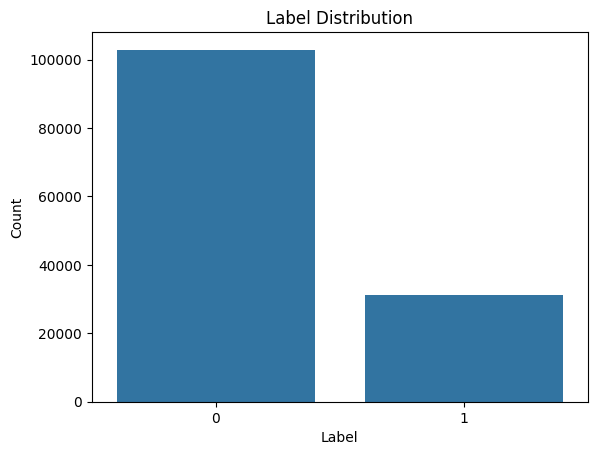

In [ ]:
loader.show_label_distribution()
# Ï†ïÏÉÅ ÏÉÅÌôòÏûê	112,031
# Ïó∞Ï≤¥Ïûê	36,639

## Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†

In [ ]:
loader.separate_features_and_label()
# X	ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ (ÏòàÏ∏°Ïóê ÏÇ¨Ïö©Ìï† ÌäπÏßïÎì§)	Í≥†Í∞ùÏùò ÏÜåÎìù, ÎåÄÏ∂ú Í∏àÏï°, Ïù¥ÏûêÏú® Îì±
# y	ÌÉÄÍπÉ Îç∞Ïù¥ÌÑ∞ (Ïö∞Î¶¨Í∞Ä ÏòàÏ∏°ÌïòÍ≥†Ïûê ÌïòÎäî Ï†ïÎãµ)	Ï±ÑÎ¨¥Î∂àÏù¥Ìñâ Ïó¨Î∂Ä (Status Ïª¨Îüº)

X shape: (134093, 29), y shape: (134093,)


## Îç∞Ïù¥ÌÑ∞ Ïù∏ÏΩîÎî©(ÏõêÌï´Ïù∏ÏΩîÎî©)

In [ ]:
loader.encode_categorical()

# loader.XÍ∞Ä numpy arrayÎùºÎ©¥ DataFrameÏúºÎ°ú Î≥ÄÌôò
# X_encoded_df = pd.DataFrame(loader.X) # Ïª¨Îüº Î∂ôÌûàÏßÄ ÏïäÍ≥† ÎßåÎì§Í∏∞
X_encoded_df = pd.DataFrame(loader.X, columns=loader.encoded_columns)

# Î≥ÄÌôòÎêú Îç∞Ïù¥ÌÑ∞ ÎØ∏Î¶¨ Î≥¥Í∏∞ (5Ìñâ)
X_encoded_df.head()

# ÎûúÎç§Ìè¨Î†àÏä§Ìä∏Î•º ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Ï†ïÏùò
classification_feature_names = loader.encoded_columns  # <-- Ïó¨Í∏∞ÏóêÏÑú Ï∂îÏ∂ú

Ïù∏ÏΩîÎî©Ìï† Î≤îÏ£ºÌòï Ïª¨Îüº: ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'Region', 'Security_Type']


## Îç∞Ïù¥ÌÑ∞ ÌïôÏäµ,ÌÖåÏä§Ìä∏,Í≤ÄÏ¶ù Î∂ÑÌï†

In [ ]:
loader.split_data()
print("Train ÎùºÎ≤® Î∂ÑÌè¨:")
print(pd.Series(loader.y_train).value_counts(normalize=True))

print("\nTest ÎùºÎ≤® Î∂ÑÌè¨:")
print(pd.Series(loader.y_test).value_counts(normalize=True))

# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Îäî ÏïΩ 134,093Í∞ú
# ÏïΩ 64% Train, 16% Validation, 20% Test ÎπÑÏú®Î°ú ÎÇòÎâòÏñ¥Ïßê
# Í∞Å ÏÑ∏Ìä∏ Î™®Îëê 41Í∞úÏùò ÌäπÏÑ±ÏùÑ Ìè¨Ìï®
# Status = 1 (Ï±ÑÎ¨¥Î∂àÏù¥ÌñâÏûê)Îäî Ï†ÑÏ≤¥Ïùò ÏïΩ 23.3%
# Status = 0 (Ï†ïÏÉÅ ÏÉÅÌôòÏûê)Îäî Ï†ÑÏ≤¥Ïùò ÏïΩ 76.7%
# Î∂ÑÌè¨Îäî Train, Test Î™®Îëê Í±∞Ïùò ÎèôÏùºÌïòÍ≤å Ïú†ÏßÄÎê®

Data split ÏôÑÎ£å:
Train: (85819, 41), Validation: (21455, 41), Test: (26819, 41)
Train ÎùºÎ≤® Î∂ÑÌè¨:
Status
0    0.767254
1    0.232746
Name: proportion, dtype: float64

Test ÎùºÎ≤® Î∂ÑÌè¨:
Status
0    0.767255
1    0.232745
Name: proportion, dtype: float64


## Îç∞Ïù¥ÌÑ∞ Í≤∞Ï∏°Ïπò Î≥¥Í∞ï

In [ ]:
loader.handle_missing()

Train Í≤∞Ï∏°Ïπò Ïàò: 58210
Val Í≤∞Ï∏°Ïπò Ïàò: 14487
Test Í≤∞Ï∏°Ïπò Ïàò: 18120
Í≤∞Ï∏°Ïπò Î≥¥Í∞ï ÏôÑÎ£å (Train Í∏∞Ï§ÄÏúºÎ°ú fit)


## Îç∞Ïù¥ÌÑ∞ Ïä§ÏºÄÏùºÎßÅ

In [ ]:
# 1. Ïä§ÏºÄÏùºÎßÅ ÏàòÌñâ
loader.scale_features()

# 2. ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Í∏∞Ï§ÄÏúºÎ°ú DataFrame Î≥µÏõê
scaled_X_train = pd.DataFrame(loader.X_train, columns=loader.encoded_columns)

# 3. ÌèâÍ∑†Í≥º ÌëúÏ§ÄÌé∏Ï∞® ÏöîÏïΩ Ï∂úÎ†•
print('Ïä§ÏºÄÏùºÎßÅ ÌõÑ (Train Í∏∞Ï§Ä) ÏùºÎ∂Ä ÌäπÏÑ± ÌÜµÍ≥Ñ:')
print(scaled_X_train.describe().T[['mean', 'std']].head())

# 4. Ï†ÑÏ≤¥ ÌèâÍ∑†Í≥º ÌëúÏ§ÄÌé∏Ï∞® ÌèâÍ∑†Í∞í
print('\nÏ†ÑÏ≤¥ ÌèâÍ∑† (mean):', np.round(scaled_X_train.mean().mean(), 4))
print('Ï†ÑÏ≤¥ ÌëúÏ§ÄÌé∏Ï∞® (std):', np.round(scaled_X_train.std().mean(), 4))

# 5. ÏÉÅÏàò ÌîºÏ≤ò ÌÉêÏßÄ (std == 0)
stds = scaled_X_train.std()
constant_features = stds[stds == 0].index.tolist()

# 6. Í≤∞Í≥º Ï∂úÎ†•
print('\n std = 0 (ÏÉÅÏàòÍ∞í)Ïù∏ ÌîºÏ≤ò Î™©Î°ù:')
if constant_features:
    for col in constant_features:
        print(f"- {col}")
else:
    print("ÏÉÅÏàò ÌîºÏ≤ò ÏóÜÏùå")

print(f'\nÏ¥ù {len(constant_features)}Í∞úÏùò ÌîºÏ≤òÍ∞Ä ÏÉÅÏàòÏûÖÎãàÎã§.')


Ïä§ÏºÄÏùºÎßÅ ÏôÑÎ£å (Train Í∏∞Ï§Ä fit)
Ïä§ÏºÄÏùºÎßÅ ÌõÑ (Train Í∏∞Ï§Ä) ÏùºÎ∂Ä ÌäπÏÑ± ÌÜµÍ≥Ñ:
                         mean       std
ID               1.167417e-16  1.000006
year             0.000000e+00  0.000000
loan_amount      4.338484e-17  1.000006
Upfront_charges  5.418966e-17  1.000006
term             8.918732e-16  1.000006

Ï†ÑÏ≤¥ ÌèâÍ∑† (mean): 0.0
Ï†ÑÏ≤¥ ÌëúÏ§ÄÌé∏Ï∞® (std): 0.9756

 std = 0 (ÏÉÅÏàòÍ∞í)Ïù∏ ÌîºÏ≤ò Î™©Î°ù:
- year

Ï¥ù 1Í∞úÏùò ÌîºÏ≤òÍ∞Ä ÏÉÅÏàòÏûÖÎãàÎã§.


## ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ÏÑúÌïú Ïñ∏Îçî ÏÉòÌîåÎßÅ

In [ ]:
# loader.apply_oversampling()
loader.apply_undersampling()

Ïñ∏ÎçîÏÉòÌîåÎßÅ ÏôÑÎ£å: {0: 19974, 1: 19974}


## Ï†ÑÏ≤òÎ¶¨Îêú ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏

In [ ]:
# ÎÑòÌååÏù¥ Î∞∞Ïó¥ÏùÑ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôò (ÏûÖÎ†• ÌîºÏ≤ò + ÎùºÎ≤® Ìï©ÏπòÍ∏∞)
train_df = pd.DataFrame(loader.X_train)
train_df['Label'] = loader.y_train.reset_index(drop=True)

# ÏÉÅÏúÑ 5Í∞ú Ìñâ ÎØ∏Î¶¨ Î≥¥Í∏∞
print(train_df.head())

print(train_df['Label'].value_counts(normalize=True))

print("Train NaN Ï°¥Ïû¨ Ïó¨Î∂Ä:", np.isnan(loader.X_train).any())
print("Validation NaN Ï°¥Ïû¨ Ïó¨Î∂Ä:", np.isnan(loader.X_val).any())
print("Test NaN Ï°¥Ïû¨ Ïó¨Î∂Ä:", np.isnan(loader.X_test).any())

          0    1         2         3         4         5         6         7  \
0  1.614110  0.0 -0.302779 -1.132291  0.418429 -0.491025  0.001549 -0.185343   
1  0.941334  0.0 -0.114149  2.400446  0.418429 -0.009402 -0.176276  0.526276   
2  0.417838  0.0 -0.994425  0.688698 -2.846706 -0.771972  0.130876  0.122147   
3  0.090921  0.0  0.577496 -0.988306  0.418429  0.231410  0.017715 -0.378623   
4 -0.356967  0.0 -0.805794  0.012037 -0.016922 -0.731837 -0.628920  0.745912   

          8         9  ...        32        33        34        35        36  \
0  0.381609  0.877217  ... -0.040997 -0.646949 -0.334887 -0.623946 -0.996777   
1 -0.468423 -2.016978  ... -0.040997 -0.646949 -0.334887 -0.623946  1.003233   
2 -0.809309 -0.458565  ... -0.040997 -0.646949 -0.334887  1.602702  1.003233   
3  0.346819 -1.571717  ... -0.040997  1.545717 -0.334887 -0.623946 -0.996777   
4 -0.301753  0.209326  ... -0.040997 -0.646949 -0.334887  1.602702  1.003233   

        37        38        39        

## Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ Ï†ïÏùò

In [ ]:
import torch.nn as nn

class TorchBinomialLogisticRegression(nn.Module):
    def __init__(self, data, num_class):
        super(TorchBinomialLogisticRegression, self).__init__()
        self.logistic_regressor = nn.Linear(data.shape[1], num_class)

    def forward(self, data):
        return self.logistic_regressor(data)

    def get_params(self):
        weight = self.logistic_regressor.weight.detach().cpu().numpy()
        bias = self.logistic_regressor.bias.detach().cpu().numpy()
        return weight, bias

## Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Ìï®Ïàò ÌïôÏäµ Ìï®Ïàò Ï†ïÏùò

In [ ]:
def train_logistic_regression(loader, num_epochs=100, learning_rate=1e-3, patience=20, use_class_weights=True):
    X_train = torch.tensor(loader.X_train, dtype=torch.float32).to(device)
    y_train = torch.tensor(loader.y_train.values, dtype=torch.long).to(device)
    X_val = torch.tensor(loader.X_val, dtype=torch.float32).to(device)
    y_val = torch.tensor(loader.y_val.values, dtype=torch.long).to(device)

    model = TorchBinomialLogisticRegression(data=X_train, num_class=2).to(device)

    # ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò Ï†ÅÏö©
    if use_class_weights:
        def get_inverse_class_frequency_weights(label):
            num_data = label.shape[0]
            num_negative_data = np.where(label == 0)[0].shape[0]
            num_positive_data = np.where(label == 1)[0].shape[0]

            negative_weight = num_data / (num_negative_data * 2)
            positive_weight = num_data / (num_positive_data * 2)

            class_weights = torch.tensor([negative_weight, positive_weight], dtype=torch.float32)
            print("class_weights: ", class_weights)
            return class_weights

        class_weights = get_inverse_class_frequency_weights(loader.y_train.values)
        criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))
    else:
        criterion = nn.CrossEntropyLoss()

    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    best_val_loss = float('inf')
    best_model_state = None
    best_val_f1 = 0
    counter = 0

    train_loss_history = []
    val_loss_history = []
    val_f1_history = []

    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()

        output = model(X_train)
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()

        train_loss = loss.item()
        train_loss_history.append(train_loss)

        model.eval()
        with torch.no_grad():
            val_logits = model(X_val)
            val_loss = criterion(val_logits, y_val)
            val_preds = torch.argmax(val_logits, dim=1).cpu().numpy()
            val_labels = y_val.cpu().numpy()
            val_f1 = f1_score(val_labels, val_preds)

            val_loss_history.append(val_loss.item())
            val_f1_history.append(val_f1)

        if val_loss.item() < best_val_loss:
            best_val_loss = val_loss.item()
            best_val_f1 = val_f1
            best_model_state = model.state_dict()
            counter = 0
        else:
            counter += 1
            if counter >= patience:
                print(f'Early stopping Î∞úÎèô (patience={patience}) at epoch {epoch+1}')
                break

        if (epoch + 1) % 10 == 0 or epoch == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}] - Train Loss: {train_loss:.4f}, Val Loss: {val_loss.item():.4f}, Val F1: {val_f1:.4f}')

    print('ÌïôÏäµ ÏôÑÎ£å')

    if best_model_state:
        model.load_state_dict(best_model_state)
        print(f'Í≤ÄÏ¶ù ÏÜêÏã§ Í∏∞Ï§ÄÏúºÎ°ú Í∞ÄÏû• Ï¢ãÏùÄ Î™®Îç∏ÏùÑ Î≥µÏõêÌñàÏäµÎãàÎã§ (Val Loss: {best_val_loss:.4f})')

    plt.figure(figsize=(6, 4))
    plt.plot(val_f1_history, label='Validation F1 Score')
    plt.xlabel('Epoch')
    plt.ylabel('F1 Score')
    plt.title('Validation F1 Score Over Epochs')
    plt.grid(True)
    plt.legend()
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(train_loss_history, label='Train Loss')
    plt.plot(val_loss_history, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Train vs Validation Loss')
    plt.grid(True)
    plt.legend()
    plt.show()

    return model


## ÌÖåÏä§Ìä∏ Ìï®Ïàò Ï†ïÏùò

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def test_logistic_regression(model, loader):
    model.eval()
    with torch.no_grad():
        X_test = torch.tensor(loader.X_test, dtype=torch.float32).to(device)
        y_test = loader.y_test.values

        logits = model(X_test)
        preds = torch.argmax(logits, dim=1).cpu().numpy()

        acc = accuracy_score(y_test, preds)
        prec = precision_score(y_test, preds)
        rec = recall_score(y_test, preds)
        f1 = f1_score(y_test, preds)

        print(f'\nÌÖåÏä§Ìä∏ Í≤∞Í≥º:')
        print(f'Accuracy : {acc:.4f}')
        print(f'Precision: {prec:.4f}')
        print(f'Recall   : {rec:.4f}')
        print(f'F1 Score : {f1:.4f}')


## Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Ïã§Ìñâ ÏΩîÎìú

class_weights:  tensor([1., 1.])
Epoch [1/1500] - Train Loss: 0.6930, Val Loss: 0.6957, Val F1: 0.4068
Epoch [10/1500] - Train Loss: 0.6638, Val Loss: 0.6669, Val F1: 0.4254
Epoch [20/1500] - Train Loss: 0.6359, Val Loss: 0.6395, Val F1: 0.4541
Epoch [30/1500] - Train Loss: 0.6130, Val Loss: 0.6168, Val F1: 0.4823
Epoch [40/1500] - Train Loss: 0.5952, Val Loss: 0.5985, Val F1: 0.5081
Epoch [50/1500] - Train Loss: 0.5812, Val Loss: 0.5834, Val F1: 0.5299
Epoch [60/1500] - Train Loss: 0.5697, Val Loss: 0.5704, Val F1: 0.5431
Epoch [70/1500] - Train Loss: 0.5601, Val Loss: 0.5592, Val F1: 0.5534
Epoch [80/1500] - Train Loss: 0.5519, Val Loss: 0.5493, Val F1: 0.5616
Epoch [90/1500] - Train Loss: 0.5450, Val Loss: 0.5407, Val F1: 0.5689
Epoch [100/1500] - Train Loss: 0.5390, Val Loss: 0.5332, Val F1: 0.5742
Epoch [110/1500] - Train Loss: 0.5338, Val Loss: 0.5266, Val F1: 0.5765
Epoch [120/1500] - Train Loss: 0.5293, Val Loss: 0.5209, Val F1: 0.5814
Epoch [130/1500] - Train Loss: 0.5254, Val

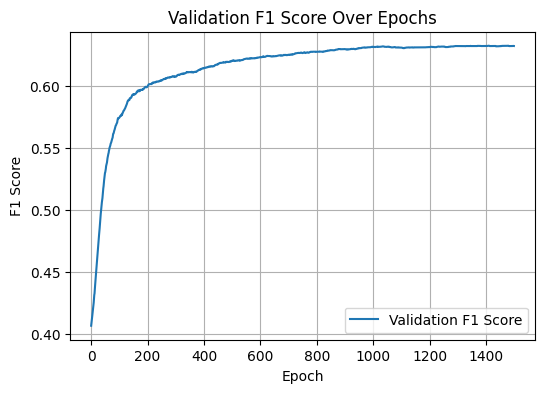

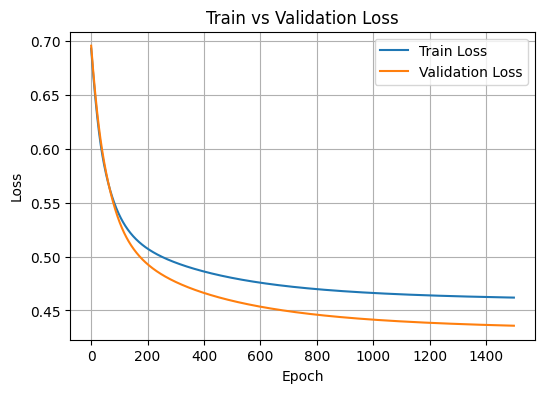


ÌÖåÏä§Ìä∏ Í≤∞Í≥º:
Accuracy : 0.8362
Precision: 0.6541
Recall   : 0.6290
F1 Score : 0.6413


In [ ]:
# 1. Î™®Îç∏ ÌõàÎ†®
model = train_logistic_regression(
    loader,
    num_epochs=1500, #1500 Ïù¥ÏÉÅÏúºÎ°úÎäî ÌÅ∞ Ï∞®Ïù¥Í∞Ä ÏóÜÏóàÏäµÎãàÎã§.
    learning_rate=1e-3, #1e-4Î°ú ÌïòÎ©¥ Ïò§ÌûàÎ†§ ÌïôÏäµÎ•†Ïù¥ Îñ®Ïñ¥Ï°åÏäµÎãàÎã§.
    use_class_weights=True  # Ï∂îÍ∞Ä
)

# 2. Î™®Îç∏ ÌÖåÏä§Ìä∏
test_logistic_regression(model, loader)

# Í∑∏Îü¨ÎÇò Í≤∞Í≥ºÍ∞íÏùÄ Í∞ÄÏ§ëÏπòÎ•º Ï§ÄÍ≤ÉÍ≥º ÏïàÏ§ÄÍ≤ÉÏùò Ï∞®Ïù¥Îäî ÎØ∏ÎØ∏ÌóÄÏäµÎãàÎã§.

In [ ]:
# 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú
# 2. Í≤∞Ï∏°ÏπòÍ∞Ä Status=1ÏóêÎßå ÏûàÎäî Ïª¨Îüº Ï†úÍ±∞
# 3. Ïù¥ÏÉÅÏπò Ï†úÍ±∞
# 4. ÌäπÏÑ±Í≥º ÎùºÎ≤® Î∂ÑÎ¶¨
# 5. Ïù∏ÏΩîÎî©
# 6. üß© **Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†**
# 7. üß™ **X_train Í∏∞Ï§Ä Í≤∞Ï∏°Ïπò Î≥¥Í∞ï**
# 8. üîß **X_train Í∏∞Ï§Ä Ïä§ÏºÄÏùºÎßÅ**
# 9. Ïò§Î≤Ñ/Ïñ∏ÎçîÏÉòÌîåÎßÅ (X_trainÏóêÎßå)
# 10. Î™®Îç∏ ÌïôÏäµ Î∞è ÌèâÍ∞Ä


## Í≤∞Ï†ïÌä∏Î¶¨ Î™®Îç∏ Ï†ïÏùò

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import graphviz

class SklearnDecisionTreeClassifier:
    def __init__(self, feature_names, max_depth, min_sample_leaf, random_state, class_weight=None):
        self.feature_names = feature_names
        self.max_depth = max_depth
        self.min_sample_leaf = min_sample_leaf
        self.random_state = random_state
        self.class_weight = class_weight

        self.classifier = tree.DecisionTreeClassifier(
            max_depth=self.max_depth,
            min_samples_leaf=self.min_sample_leaf,
            random_state=self.random_state,
            class_weight=self.class_weight  # Ïô∏Î∂ÄÏóêÏÑú ÏßÄÏ†ï Í∞ÄÎä•
        )

    def __call__(self, data):
        return self.classifier.predict(data)

    def train_model(self, train_data, train_label):
        self.classifier.fit(train_data, train_label)

    def test_model(self, test_data, test_label, label="Test"):
        pred = self.classifier.predict(test_data)
        accuracy = accuracy_score(test_label, pred)
        precision = precision_score(test_label, pred)
        recall = recall_score(test_label, pred)
        f1_measure = f1_score(test_label, pred)

        print(f'\n [{label}] Í≤∞Í≥º:')
        print(f'Accuracy : {accuracy:.4f}')
        print(f'Precision: {precision:.4f}')
        print(f'Recall   : {recall:.4f}')
        print(f'F1 Score : {f1_measure:.4f}')

    def show_tree(self):
        plt.figure(figsize=(20, 10))
        tree.plot_tree(self.classifier, feature_names=self.feature_names, filled=True)
        plt.show()

    def show_customized_tree(self):
        dot_data = tree.export_graphviz(
            self.classifier,
            out_file=None,
            feature_names=self.feature_names,
            class_names=['0', '1'],
            filled=True,
            rounded=True,
            special_characters=True
        )
        graph = graphviz.Source(dot_data)
        graph.view()


## Í≤∞Ï†ïÌä∏Î¶¨ Ïã§ÌñâÏΩîÎìú


 [Validation] Í≤∞Í≥º:
Accuracy : 0.9805
Precision: 0.9235
Recall   : 0.9990
F1 Score : 0.9598

 [Test] Í≤∞Í≥º:
Accuracy : 0.9812
Precision: 0.9262
Recall   : 0.9990
F1 Score : 0.9612


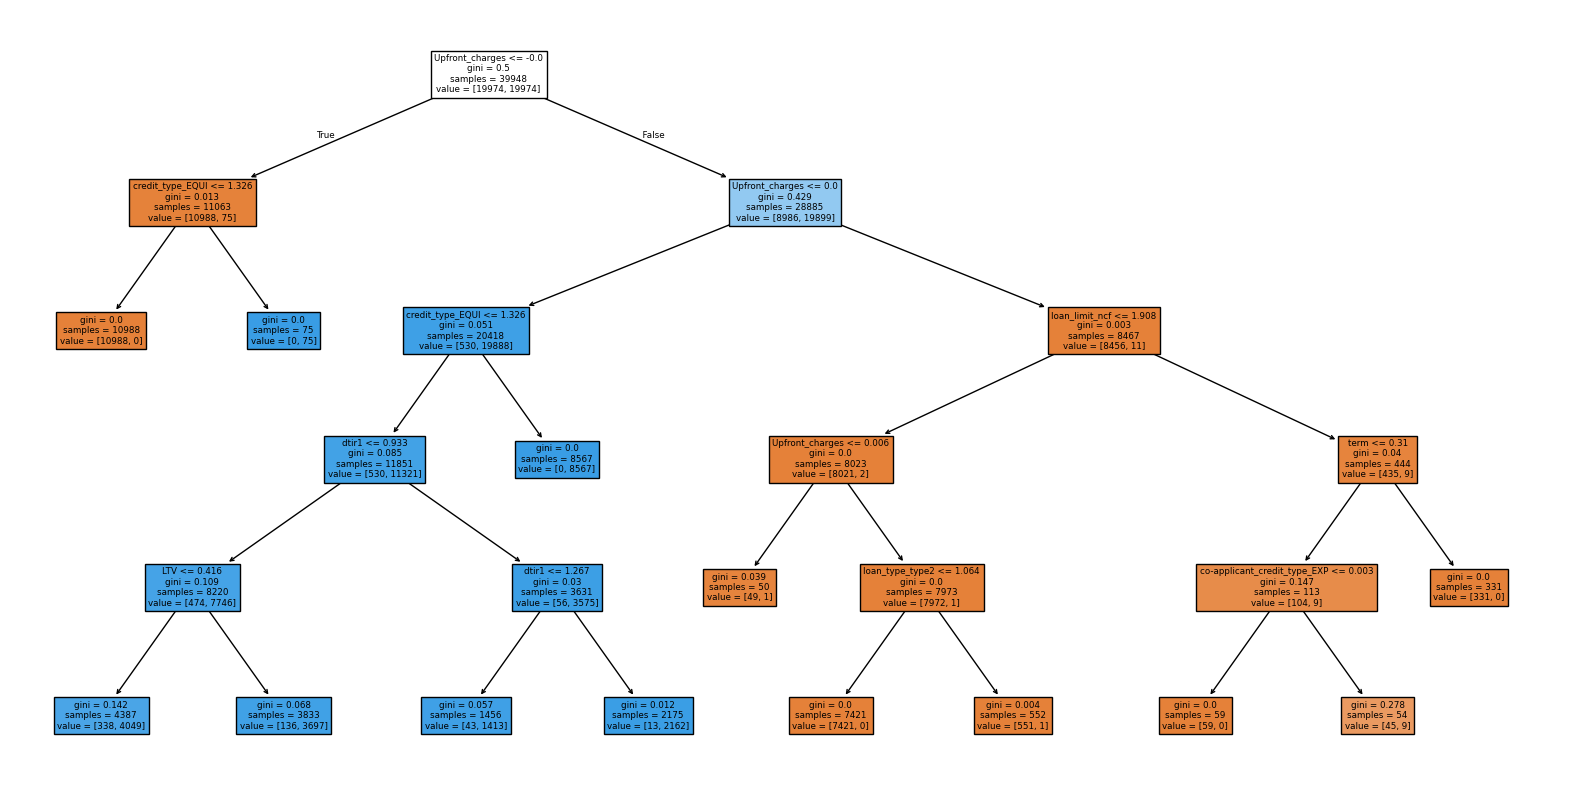

In [ ]:
# Î™®Îç∏ Ï¥àÍ∏∞Ìôî Î∞è ÌïôÏäµ
dt_model = SklearnDecisionTreeClassifier(
    feature_names=loader.encoded_columns,
    max_depth=5,
    min_sample_leaf=50,
    random_state=42,
    class_weight='balanced', # ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò -> ÌÅ¨Í≤å Î≥ÄÌôîÌïòÎäî Í±¥ ÎäêÎÅºÏßÄ Î™ªÌñàÏäµÎãàÎã§.
)

dt_model.train_model(loader.X_train, loader.y_train)

# Í≤ÄÏ¶ù ÌèâÍ∞Ä
dt_model.test_model(loader.X_val, loader.y_val, label="Validation")

# ÌÖåÏä§Ìä∏ ÌèâÍ∞Ä
dt_model.test_model(loader.X_test, loader.y_test, label="Test")

# Ìä∏Î¶¨ ÏãúÍ∞ÅÌôî
dt_model.show_tree()  # ÎòêÎäî dt_model.show_customized_tree()


## ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏ Ï†ïÏùò

In [ ]:
class SklearnRandomForestClassifier:
    def __init__(self, feature_names, n_estimators=100, max_depth=None, visualize_feature=10, random_state=42, class_weight=None):
        self.feature_names = feature_names
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.visualize_feature = visualize_feature
        self.random_state = random_state
        self.class_weight = class_weight

        self.classifier = RandomForestClassifier(
            n_estimators=self.n_estimators,
            max_depth=self.max_depth,
            bootstrap=True,
            max_features='sqrt',
            class_weight=self.class_weight,
            random_state=self.random_state
        )

    def __call__(self, data):
        return self.classifier.predict(data)

    def train_model(self, train_data, train_label):
        self.classifier.fit(train_data, train_label)

    def evaluate_model(self, data, label, dataset_name="Test"):
        pred = self.classifier.predict(data)
        accuracy = accuracy_score(label, pred)
        precision = precision_score(label, pred)
        recall = recall_score(label, pred)
        f1_measure = f1_score(label, pred)

        print(f"[{dataset_name}] Í≤∞Í≥º:")
        print(f"Accuracy : {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall   : {recall:.4f}")
        print(f"F1 Score : {f1_measure:.4f}")
        print("-" * 40)

    def show_trees(self, count=1):
        for idx, decision_tree in enumerate(self.classifier.estimators_[:count]):
            plt.figure(figsize=(20, 10))
            tree.plot_tree(decision_tree, filled=True, feature_names=self.feature_names)
            plt.title(f"Tree #{idx+1}")
            plt.show()

    def plot_feature_importance(self):
        importances = self.classifier.feature_importances_
        indices = np.argsort(importances)[::-1]
        top_features = indices[:self.visualize_feature]
        plt.figure(figsize=(10, 5))
        plt.title(f"Top {self.visualize_feature} Important Features")
        plt.bar(range(len(top_features)), importances[top_features], align="center")
        plt.xticks(range(len(top_features)), [self.feature_names[i] for i in top_features], rotation=90)
        plt.tight_layout()
        plt.show()


## ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ Ïã§Ïäµ ÏΩîÎìú

[Validation] Í≤∞Í≥º:
Accuracy : 0.9808
Precision: 0.9243
Recall   : 0.9996
F1 Score : 0.9605
----------------------------------------
[Test] Í≤∞Í≥º:
Accuracy : 0.9821
Precision: 0.9289
Recall   : 0.9998
F1 Score : 0.9630
----------------------------------------


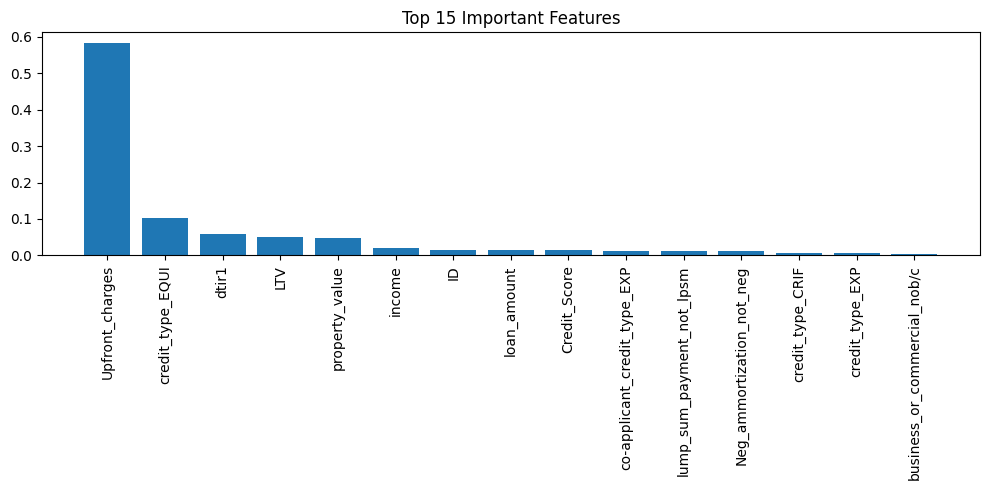

In [ ]:
# ÌïôÏäµ/Í≤ÄÏ¶ù/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
classification_train_data, classification_train_label = loader.X_train, loader.y_train
classification_val_data, classification_val_label = loader.X_val, loader.y_val
classification_test_data, classification_test_label = loader.X_test, loader.y_test

# Î™®Îç∏ Ï†ïÏùò
sklearn_rf_classifier = SklearnRandomForestClassifier(
    feature_names=classification_feature_names,
    n_estimators=100,
    max_depth=20,
    visualize_feature=15,
    random_state=42,
    class_weight='balanced' # ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Ïó≠Ïãú Í∞ÄÏ§ëÏπòÏóê ÎåÄÌï¥ÏÑú ÌÅ∞ Ï∞®Ïù¥Îäî ÏóÜÏóàÏäµÎãàÎã§.
)

# ÌõàÎ†®
sklearn_rf_classifier.train_model(classification_train_data, classification_train_label)

# Í≤ÄÏ¶ù ÏÑ±Îä•
sklearn_rf_classifier.evaluate_model(classification_val_data, classification_val_label, dataset_name="Validation")

# ÌÖåÏä§Ìä∏ ÏÑ±Îä•
sklearn_rf_classifier.evaluate_model(classification_test_data, classification_test_label, dataset_name="Test")

# ÌîºÏ≤ò Ï§ëÏöîÎèÑ ÏãúÍ∞ÅÌôî
sklearn_rf_classifier.plot_feature_importance()


## XBoost Î™®Îç∏ Ï†ïÏùò

In [ ]:
# 2. Sklearn GBDT Î™®Îç∏ ÌÅ¥ÎûòÏä§ Ï†ïÏùò
class SklearnGradientBoostingClassifier:
    def __init__(self, feature_names, n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42):
        self.feature_names = feature_names
        self.classifier = GradientBoostingClassifier(
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            max_depth=max_depth,
            random_state=random_state
        )

    def __call__(self, data):
        return self.classifier.predict(data)

    def train_model(self, train_data, train_label, sample_weights=None):
        if sample_weights is not None:
            self.classifier.fit(train_data, train_label, sample_weight=sample_weights)
        else:
            self.classifier.fit(train_data, train_label)

    def test_model(self, data, label, dataset_name="Test"):
        pred = self.classifier.predict(data)
        acc = accuracy_score(label, pred)
        prec = precision_score(label, pred)
        rec = recall_score(label, pred)
        f1 = f1_score(label, pred)
        print(f"[{dataset_name}] Accuracy : {acc:.4f}")
        print(f"[{dataset_name}] Precision: {prec:.4f}")
        print(f"[{dataset_name}] Recall   : {rec:.4f}")
        print(f"[{dataset_name}] F1 Score : {f1:.4f}")
        print("-" * 40)

    def plot_feature_importance(self):
        importances = self.classifier.feature_importances_
        indices = np.argsort(importances)[::-1]
        top_features = indices[:15]

        plt.figure(figsize=(10, 5))
        plt.title("Top 15 Feature Importances (Sklearn GBDT)")
        plt.bar(range(len(top_features)), importances[top_features], align="center")
        plt.xticks(range(len(top_features)), [self.feature_names[i] for i in top_features], rotation=90)
        plt.tight_layout()
        plt.show()


# 3. XGBoost Î™®Îç∏ ÌÅ¥ÎûòÏä§ Ï†ïÏùò
class XGBoostClassifierWrapper:
    def __init__(self, feature_names, n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42, scale_pos_weight=None):
        self.feature_names = feature_names
        self.scale_pos_weight = scale_pos_weight
        self.classifier = xgb.XGBClassifier(
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            max_depth=max_depth,
            use_label_encoder=False,
            eval_metric='logloss',
            random_state=random_state,
            scale_pos_weight=self.scale_pos_weight  # Î∂àÍ∑†Ìòï ÌÅ¥ÎûòÏä§ ÎπÑÏú® Ï†ÅÏö©

        )

    def __call__(self, data):
        return self.classifier.predict(data)

    def train_model(self, train_data, train_label):
        self.classifier.fit(train_data, train_label)

    def test_model(self, data, label, dataset_name="Test"):
        pred = self.classifier.predict(data)
        acc = accuracy_score(label, pred)
        prec = precision_score(label, pred)
        rec = recall_score(label, pred)
        f1 = f1_score(label, pred)
        print(f"[{dataset_name}] Accuracy : {acc:.4f}")
        print(f"[{dataset_name}] Precision: {prec:.4f}")
        print(f"[{dataset_name}] Recall   : {rec:.4f}")
        print(f"[{dataset_name}] F1 Score : {f1:.4f}")
        print("-" * 40)

    def plot_feature_importance(self):
        xgb.plot_importance(self.classifier, importance_type="weight", max_num_features=15)
        plt.title("Top 15 Feature Importances (XGBoost)")
        plt.tight_layout()
        plt.show()

# 4. ÌïôÏäµ/Í≤ÄÏ¶ù/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ìï†Îãπ
classification_train_data = loader.X_train
classification_train_label = loader.y_train
classification_val_data = loader.X_val
classification_val_label = loader.y_val
classification_test_data = loader.X_test
classification_test_label = loader.y_test
classification_feature_names = loader.encoded_columns

# 5. Î™®Îç∏ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï
n_estimators = 100
learning_rate = 0.1
max_depth = 4
random_state = 42

## XBoost Î™®Îç∏ ÌèâÍ∞Ä

[Validation] Accuracy : 0.9812
[Validation] Precision: 0.9263
[Validation] Recall   : 0.9988
[Validation] F1 Score : 0.9612
----------------------------------------
[Test] Accuracy : 0.9823
[Test] Precision: 0.9295
[Test] Recall   : 0.9997
[Test] F1 Score : 0.9633
----------------------------------------


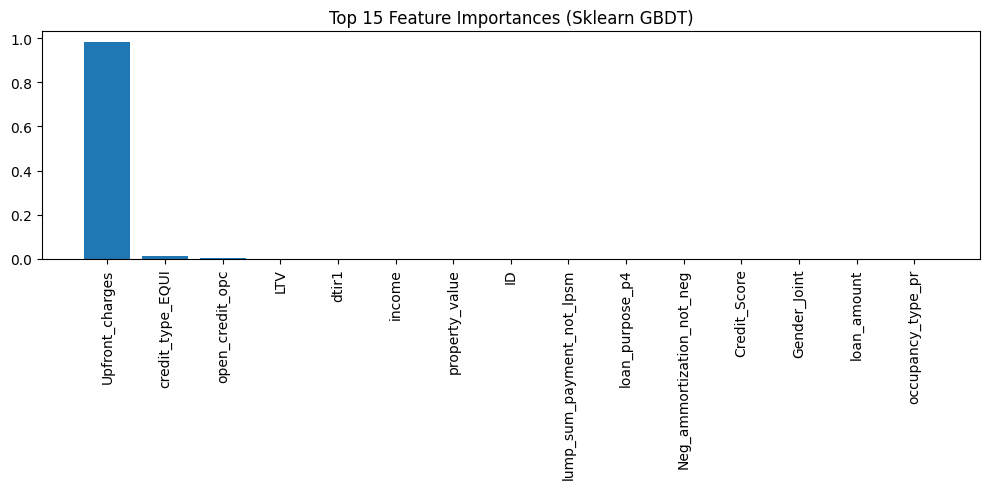

XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [14:26:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[Validation] Accuracy : 0.9808
[Validation] Precision: 0.9244
[Validation] Recall   : 0.9994
[Validation] F1 Score : 0.9605
----------------------------------------
[Test] Accuracy : 0.9820
[Test] Precision: 0.9284
[Test] Recall   : 0.9998
[Test] F1 Score : 0.9628
----------------------------------------


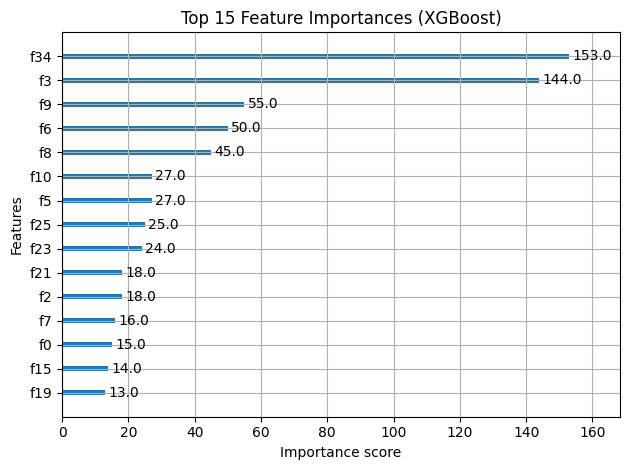

In [ ]:
from sklearn.utils.class_weight import compute_sample_weight

# 1. Sklearn GBDTÏö© sample_weight Í≥ÑÏÇ∞
sample_weights = compute_sample_weight(class_weight='balanced', y=classification_train_label)

# 2. XGBoostÏö© scale_pos_weight Í≥ÑÏÇ∞
neg, pos = np.bincount(classification_train_label)
scale_pos_weight = neg / pos  # Ïòà: 9000 / 1000 = 9.0


# Sklearn GBDT ÌïôÏäµ Î∞è ÌèâÍ∞Ä
sklearn_gbdt_classifier = SklearnGradientBoostingClassifier(
    classification_feature_names, n_estimators, learning_rate, max_depth, random_state
)

# Í∞ÄÏ§ëÏπò Ï†ÅÏö©ÌïòÏó¨ ÌïôÏäµ
sklearn_gbdt_classifier.train_model(
    classification_train_data,
    classification_train_label,
    sample_weights=sample_weights
)

# ÏÑ±Îä• ÌèâÍ∞Ä
sklearn_gbdt_classifier.test_model(classification_val_data, classification_val_label, dataset_name="Validation")
sklearn_gbdt_classifier.test_model(classification_test_data, classification_test_label, dataset_name="Test")
sklearn_gbdt_classifier.plot_feature_importance()

# XGBoost ÌïôÏäµ Î∞è ÌèâÍ∞Ä
print("XGBoost")
xgboost_classifier = XGBoostClassifierWrapper(
    classification_feature_names,
    n_estimators,
    learning_rate,
    max_depth,
    random_state,
    scale_pos_weight=scale_pos_weight  # Í∞ÄÏ§ëÏπò Î∂ÄÏó¨ Î∂ÄÎ∂Ñ
)

xgboost_classifier.train_model(classification_train_data, classification_train_label)
xgboost_classifier.test_model(classification_val_data, classification_val_label, dataset_name="Validation")
xgboost_classifier.test_model(classification_test_data, classification_test_label, dataset_name="Test")
xgboost_classifier.plot_feature_importance()

## Í∂ÅÍ∏àÌïúÏ†ê
### ÏßÄÍ∏à Ï†ÑÏ≤òÎ¶¨Î•º Ïù¥Î†áÍ≤å ÌñàÎäîÎç∞ ÎßûÎäî Í≥ºÏ†ïÏù∏ÏßÄ? (ÏûòÎ™ªÎêòÏóàÎã§Î©¥ ÏΩîÎ©òÌä∏ Î∂ÄÌÉÅÎìúÎ¶ΩÎãàÎã§)
### Î°úÏßÄÏä§Ìã± Î∂ÄÎ∂ÑÏóêÏÑúÎßå Ïôú ÌèâÍ∞Ä Ï†êÏàòÍ∞Ä ÎÇÆÏùÄÍ±¥ÏßÄ?
### ÎÇòÎ®∏ÏßÄ Î™®Îç∏ÏóêÏÑúÎäî ÌèâÍ∞ÄÍ∞Ä ÎÑàÎ¨¥ ÎÜíÍ≤å ÎÇòÏò§ÎäîÎç∞ ÎßûÎäîÍ±¥ÏßÄ?
### ÌãÄÎ†∏Îã§Î©¥ Í≥ºÏ†ÅÌï©Ïù¥ ÎêúÍ±¥ÏßÄ? ÏïÑÎãàÎ©¥ Ïñ¥Îñ§Ï†êÏù¥ ÏûòÎ™ªÎêòÏóàÎäîÏßÄ?
### ÌòÑÏóÖÏóêÏÑúÎèÑ csv ÌååÏùºÎ°ú ÏßÑÌñâÏùÑ ÎßéÏù¥ ÌïòÎäîÏßÄ?
### Ïù¥Îü∞ Îç∞Ïù¥ÌÑ∞Îì§Ïù¥ Ïã§ÏãúÍ∞ÑÏúºÎ°ú Îì§Ïñ¥Ïò®Îã§Î©¥ Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨Îäî Ïñ¥Îñ§ Î∞©Ìñ•ÏúºÎ°ú ÌïòÎäîÏßÄ? (ÏòàÎ•º Îì§Ïñ¥ 1Ïùº, 1Ï£ºÏùº, ÌïúÎã¨Ïùò Îç∞Ïù¥ÌÑ∞Î•º Î™®ÏúºÍ≥† ÌïôÏäµÏùÑ ÏßÑÌñâÌï¥ÏïºÌïòÎäîÍ±¥ÏßÄ Îì±...)